# 📘 Advanced Internship Assignment: Data Exploration & Analysis in Python

---

## 📦 1. Setup and Imports

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("big_mart_sales.csv") 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 🧾 2. Load the Dataset (Big Mart Sales)

### ✅ Task:
- Display the dataset info
- Count missing values
- Understand the basic structure

In [92]:
df.info()
df.isnull().sum()

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Basic Statistics:
       Item_Identifier  It

## 🔧 3. Data Cleaning & Imputation

# Fill missing weights with mean
if 'Item_Weight' in df.columns:
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Fill outlet size with mode
if 'Outlet_Size' in df.columns:
    df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [96]:
# Fill missing 'Item_Weight' with mean
if 'Item_Weight' in df.columns:
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
    print("Missing values in 'Item_Weight' filled with mean.")
else:
    print("'Item_Weight' column not found.")

# Fill missing 'Outlet_Size' with mode
if 'Outlet_Size' in df.columns:
    df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
    print("Missing values in 'Outlet_Size' filled with mode.")
else:
    print("'Outlet_Size' column not found.")

# Check remaining null values
print("\nRemaining null values in the dataset:")
print(df.isnull().sum())

Missing values in 'Item_Weight' filled with mean.
Missing values in 'Outlet_Size' filled with mode.

Remaining null values in the dataset:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


C:\Users\YOSHVA.J\AppData\Local\Temp\ipykernel_20588\3835400897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\YOSHVA.J\AppData\Local\Temp\ipykernel_20588\3835400897.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

## 📊 4. Feature Engineering

# Create new features based on domain knowledge
if 'Item_Visibility' in df.columns:
    df['Item_Visibility_Bin'] = pd.cut(df['Item_Visibility'], bins=[-1, 0.02, 0.07, 0.2, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])

# Normalize Item_MRP
if 'Item_MRP' in df.columns:
    df['Item_MRP_Normalized'] = (df['Item_MRP'] - df['Item_MRP'].min()) / (df['Item_MRP'].max() - df['Item_MRP'].min())

In [100]:
# Feature Engineering: Binning 'Item_Visibility' into categories
if 'Item_Visibility' in df.columns:
    df['Item_Visibility_Bin'] = pd.cut(df['Item_Visibility'], bins=[-1, 0.02, 0.07, 0.2, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])
    print("Created 'Item_Visibility_Bin' based on visibility ranges.")
else:
    print("'Item_Visibility' column not found.")

# Normalize 'Item_MRP'
if 'Item_MRP' in df.columns:
    df['Item_MRP_Normalized'] = (df['Item_MRP'] - df['Item_MRP'].min()) / (df['Item_MRP'].max() - df['Item_MRP'].min())
    print("Created 'Item_MRP_Normalized' by scaling 'Item_MRP' to [0, 1].")
else:
    print("'Item_MRP' column not found.")

# Display the first few rows to verify the new features
print("\nUpdated DataFrame with new features:")
print(df[['Item_Visibility', 'Item_Visibility_Bin', 'Item_MRP', 'Item_MRP_Normalized']].head())


Created 'Item_Visibility_Bin' based on visibility ranges.
Created 'Item_MRP_Normalized' by scaling 'Item_MRP' to [0, 1].

Updated DataFrame with new features:
   Item_Visibility Item_Visibility_Bin  Item_MRP  Item_MRP_Normalized
0         0.016047                 Low  249.8092             0.927507
1         0.019278                 Low   48.2692             0.072068
2         0.016760                 Low  141.6180             0.468288
3         0.000000                 Low  182.0950             0.640093
4         0.000000                 Low   53.8614             0.095805


## 📈 5. Exploratory Data Analysis (EDA)

# Distribution of target variable
plt.figure(figsize=(8, 4))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

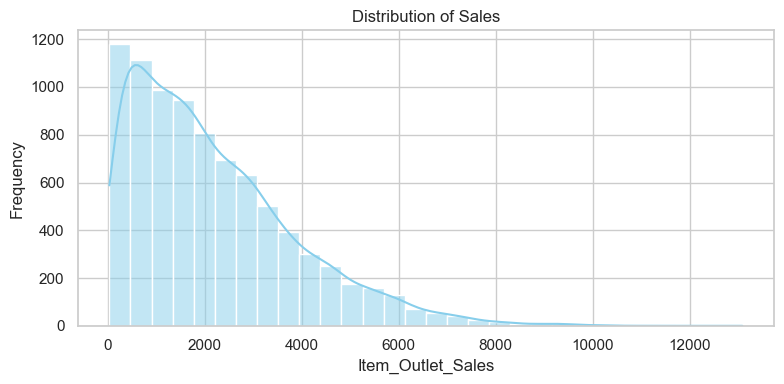

In [102]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Item_Outlet_Sales'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Sales by Outlet Type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

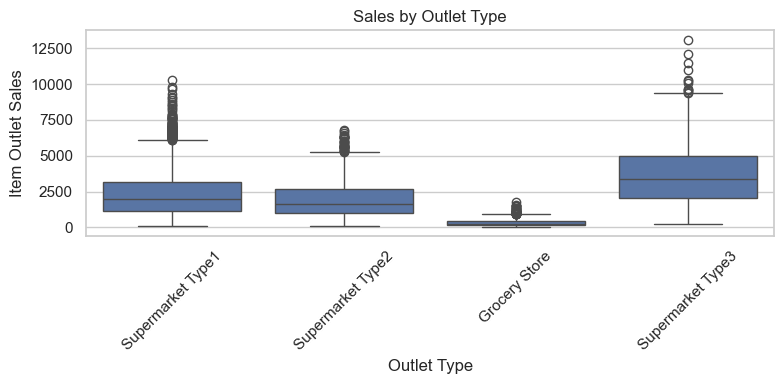

In [104]:
# Plot Sales by Outlet Type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📐 6. Advanced Subsetting with NumPy & Conditions

# Filter high selling products
high_sales = df['Item_Outlet_Sales'] > df['Item_Outlet_Sales'].quantile(0.90)
df_high_sales = df[high_sales]
df_high_sales[['Item_Identifier', 'Item_Outlet_Sales']].head()

In [106]:
# Filter high-selling products (top 10% sales)
high_sales = df['Item_Outlet_Sales'] > df['Item_Outlet_Sales'].quantile(0.90)
df_high_sales = df[high_sales]
# Display top entries
print("Top high-selling products:")
print(df_high_sales[['Item_Identifier', 'Item_Outlet_Sales']].head())

Top high-selling products:
   Item_Identifier  Item_Outlet_Sales
9            FDU28          4710.5350
43           FDC02          6768.5228
47           FDV49          5815.0972
54           NCP18          4815.0656
55           FDK21          6258.5200


# Use NumPy to apply conditional logic
df['High_Price'] = np.where(df['Item_MRP'] > 200, 1, 0)
df[['Item_MRP', 'High_Price']].head()

In [108]:
# Apply conditional logic using NumPy
df['High_Price'] = np.where(df['Item_MRP'] > 200, 1, 0)
# Display the result
print(df[['Item_MRP', 'High_Price']].head())

   Item_MRP  High_Price
0  249.8092           1
1   48.2692           0
2  141.6180           0
3  182.0950           0
4   53.8614           0


## 📉 7. Correlation Heatmap

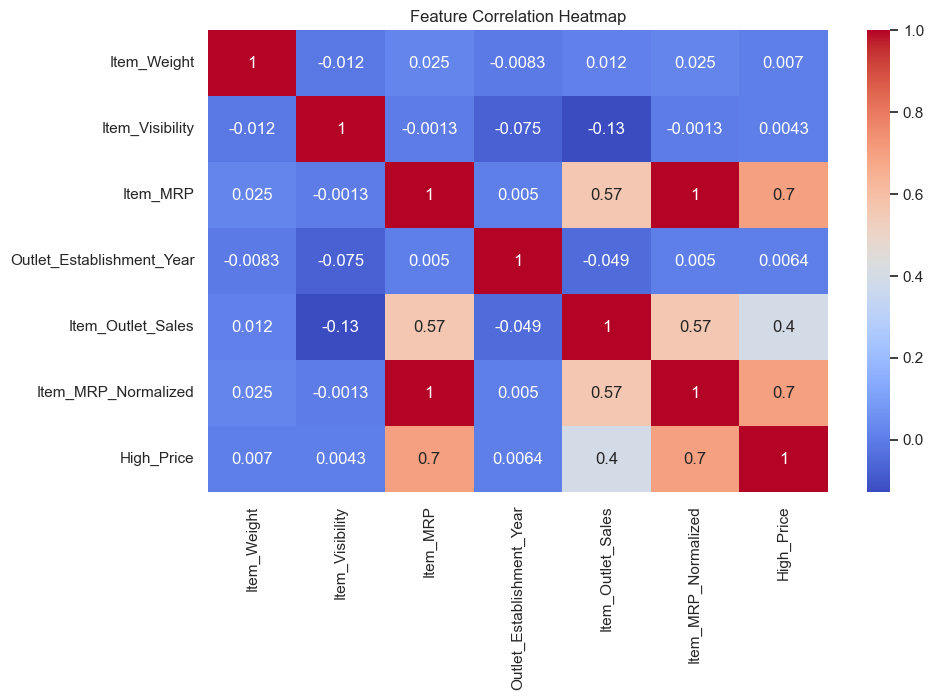

In [110]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 📌 Final Project Task

# Create a business dashboard answering

## What product categories perform best?

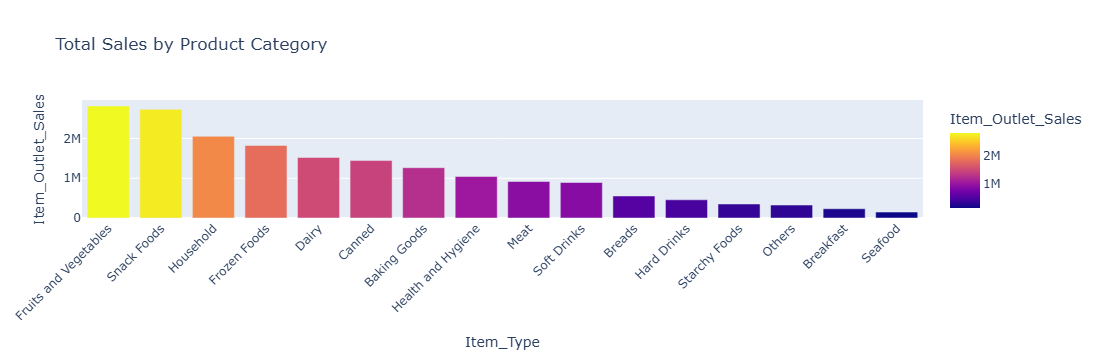

In [142]:
category_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales', ascending=False)
fig1 = px.bar(category_sales, x='Item_Type', y='Item_Outlet_Sales', title='Total Sales by Product Category', color='Item_Outlet_Sales')
fig1.update_layout(xaxis_tickangle=-45)

## Which outlet types generate more revenue?

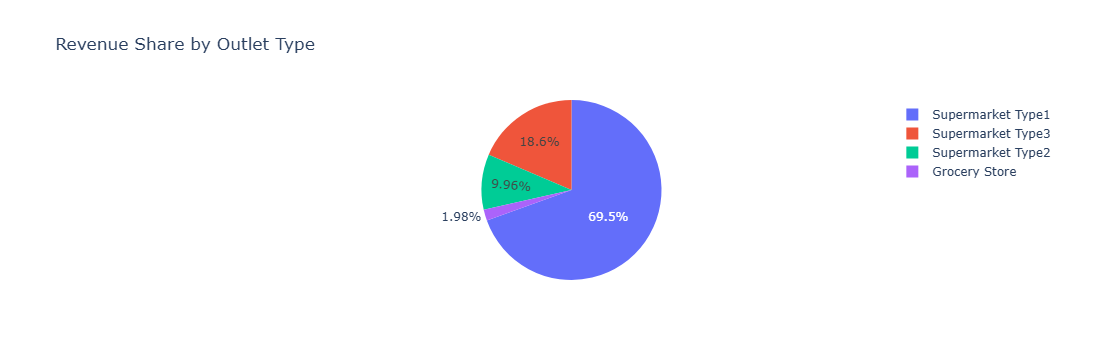

In [147]:
outlet_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()
fig2 = px.pie(outlet_sales, names='Outlet_Type', values='Item_Outlet_Sales', title='Revenue Share by Outlet Type')
fig2.show()

## Are high MRP products really driving more sales?

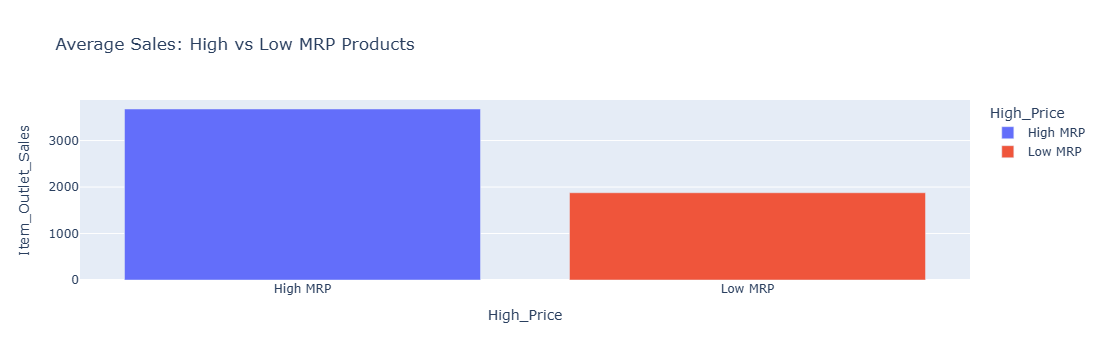

In [152]:
mrp_sales = df.groupby('High_Price')['Item_Outlet_Sales'].mean().reset_index()
fig3 = px.bar(mrp_sales, x='High_Price', y='Item_Outlet_Sales', title='Average Sales: High vs Low MRP Products', color='High_Price')
fig3.show()